# **실습1. 마켓과 머신러닝**

## **생선 분류 문제**

### 도미 데이터 준비

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

### 도미 길이와 무게 데이터에 대한 산점도

In [2]:
# 산점도를 위한 라이브러리 준비
import matplotlib.pyplot as plt

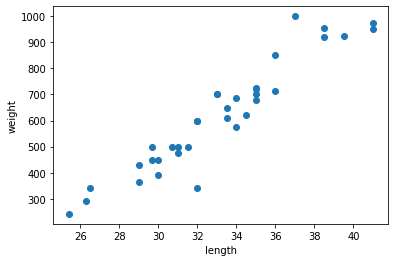

In [3]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

생선의 길이가 길수록 무게가 많이 나가는 모양 ⇒선형적 관계

**<선형으로 나타냄>**
피어슨 상관계수

**<순서로 나타냄>**
스피어맨 상관계수

**<같은 순서를 갖는지, 방향성을 가지고 나타냄>**
캔달 상관계수

### 빙어 데이터 준비

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

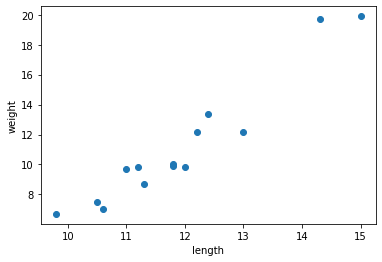

In [5]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 도미 데이터와 빙어 데이터 병합한 산점도

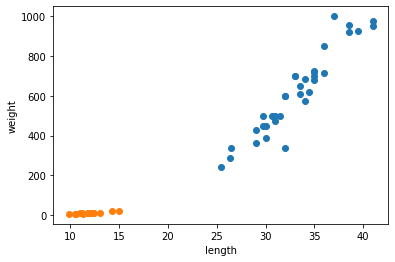

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **첫 번째 머신러닝 프로그램**
## **생선 분류 문제1**

### 두 생선 데이터 병합

In [7]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
# 2차원 리스트로 변환
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 타켓(레이블) 데이터 생성

In [9]:
# 도미의 개수 35개, 빙어의 개수 14개 
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## **K-최근접 이웃(KNN) 알고리즘을 이용한 분류**

### 사이킷런의 K- 최근접이웃 클래스

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**KNeighborsClassifier 객체 생성**

In [11]:
kn = KNeighborsClassifier()

**훈련(training) : fit(features, label) 매서드**

In [12]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

**모델 평가 : score() 매서드 ⇒ 정확도**

In [13]:
kn.score(fish_data, fish_target)

1.0

### 정확도 (accurancy)
- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
- 정확히 맞힌 개수 / 전체 데이터 수

## **K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류**

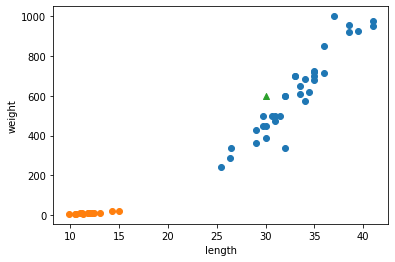

In [14]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
kn.predict([[30, 600], [50, 500], [5, 20]])

array([1, 1, 0])

### **_fit_X 속성** : fish_data를 가지고 있음

In [16]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


### **_y 속성** : fish_target 을 가지고 있음

In [17]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### **K-neighbors 크기 지정**

In [18]:
# 크기 확인
print(kn.n_neighbors)

5


#### **K = 49 인 경우 모델 훈련 및 성능**

In [19]:
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [20]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

#### K = 49 개 중 도미가 35개이므로 어떤 데이터를 넣어도 무조건 도미로 예측
⇒ 잘못 예측 하는 것

In [21]:
print(35 / 49)

0.7142857142857143


### **확인 문제**

In [22]:
Kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for k in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = k
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    print('k = %d score = %f' %(k, score))
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(k, score)
        break

k = 5 score = 1.000000
k = 6 score = 1.000000
k = 7 score = 1.000000
k = 8 score = 1.000000
k = 9 score = 1.000000
k = 10 score = 1.000000
k = 11 score = 1.000000
k = 12 score = 1.000000
k = 13 score = 1.000000
k = 14 score = 1.000000
k = 15 score = 1.000000
k = 16 score = 1.000000
k = 17 score = 1.000000
k = 18 score = 0.979592
18 0.9795918367346939


# **[마무리]**
- 특성
- k-최근접 이웃 알고리즘 (KNN)
- 정확도

## 핵심 패키지와 함수
**scikit-learn**
- KNeighborsClassifier()
- fit()
- predict()
- score()

# **첫 번째 머신러닝 프로그램 수정**
## **생선 분류 문제2 (Data Split)** 

In [43]:
# 첫 번쨰 머신러닝 프로그램에서 이미 실행
# length = bream_length + smelt_length
# weight = bream_weight + smelt_weight

# fish_data = [[l,w] for l, w in zip(length, weight)]
# fish_target = [1] * 35 + [0] * 14

# from sklearn.neighbors import KNeighborsClassifier
# kn = KNeighborsClassifier()

### 훈련 데이터셋과 테스트 데이터셋으로 분리

In [23]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

### 학습 및 평가

In [24]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [25]:
print(train_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
print(test_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **왜 성능이 0.0 일까?**

**편향(biased)된 데이터 셋** 구성 때문에

⇒ 거의 다 도미고 적은 나머지가 빙어라서

### 올바른 훈련데이터와 테스트 데이터 구성하기

In [14]:
import numpy as np

In [15]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [16]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
print(input_arr.shape)

(49, 2)


### **데이터 섞기 (shuffling)**
[참고] : random.seed()
- 난수를 생성하기 위한 초기값 지정
- seed를 지정하면 랜덤 함수의 결과를 동일하게 재현할 수 있음

In [18]:
np.random.seed(42)
index = np.arange(49)
print(index)
np.random.shuffle(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [19]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [20]:
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [22]:
print(input_arr[index[0]])

[ 32. 340.]


In [23]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [24]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

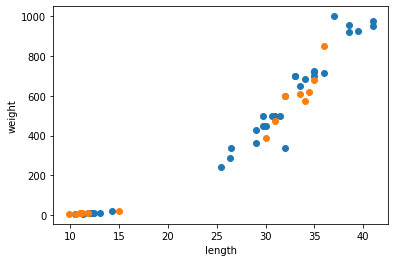

In [38]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **두 번째 머신러닝 프로그램**

In [25]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [26]:
kn.score(test_input, test_target)

1.0

In [27]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [42]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## **생선 분류 문제3 (Data전처리)**

### 넘파이로 데이터 준비하기

In [28]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [29]:
#import inmpy as np

**두 리스트 열방향으로 합치기 : 2차원 배열로**

In [30]:
# stack메소드 (함수) 이용
fish_data = np.column_stack((fish_length, fish_weight))

In [31]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**라벨 데이터**

In [34]:
# 라벨 데이터 ⇒ y
# 튜플 형태로
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [35]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### **사이킷런으로 훈련 데이터와 테스터 데이터 나누기**

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
# 매개변수 주기
# 리턴 값 지정
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [39]:
train_input.shape

(36, 2)

In [40]:
test_input.shape

(13, 2)

In [ ]:
# 1차원
train_target.shape

In [45]:
test_target.shape

(13,)

In [46]:
# 13개 데이터 중 0은 3개 1은 10개
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**데이터 분포를 반영할 분할**

In [48]:
#  stratify = fish_target 추가
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [49]:
#  stratify = fish_target을 반영해서 13개 데이터 중 0은 4개 1은 9개
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### **성능 평가 및 테스트**

In [52]:
# from sklearn.neighbors import KNeighborsClassifier
# kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

#### **도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?**

In [54]:
print(kn.predict([[25, 150]]))

[0.]


**테스트할 도미 데이터를 포함한 산점도**

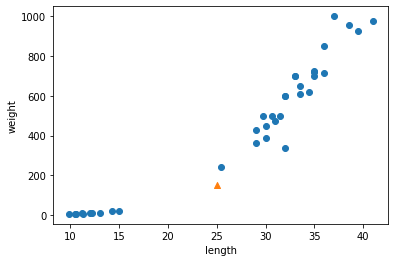

In [55]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**테스트할 도미 데이터와 이웃하는 데이터들**

In [60]:
kn.kneighbors([[25,150]])
# 가장 가까운 이웃들에 대한 이웃정보 (k=5이므로 5개의 이웃에 대한 정보)
# 인덱스 정보

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

In [61]:
dist, idx = kn.kneighbors([[25,150]])

In [64]:
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [62]:
idx

array([[21, 33, 19, 30,  1]], dtype=int64)

In [63]:
print(idx)

[[21 33 19 30  1]]


In [65]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

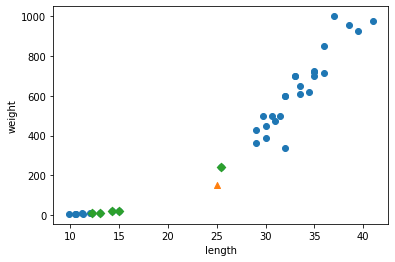

In [66]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # 전체 tatin data set의 x와 y값
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker = 'D')  # 다이아몬드 모양
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
print(train_target[idx])

[[1. 0. 0. 0. 0.]]


In [68]:
# 거리에 대한 정보 출력
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### **기준을 맞춰라**
- 최근접이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
- 거리 계산 시 자료의 값이 큰 변수에 더 큰 영향을 받게됨

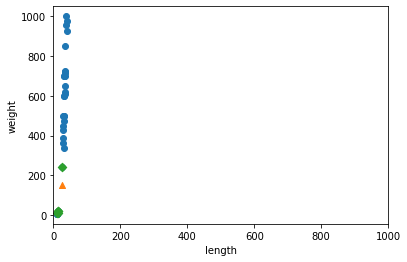

In [70]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker = 'D')  
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### **두 변수의 스케일을 같게**
- 표준화 
- 표준 점수 (Z-Score)

In [73]:
# axis = 0 열 기준 (세로 축 기준)
mean = np.mean(train_input, axis = 0)
print(mean)

[ 27.29722222 454.09722222]


In [74]:
std = np.std(train_input, axis = 0)
print(std)

[  9.98244253 323.29893931]


In [87]:
train_scaled = (train_input-mean) / std
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


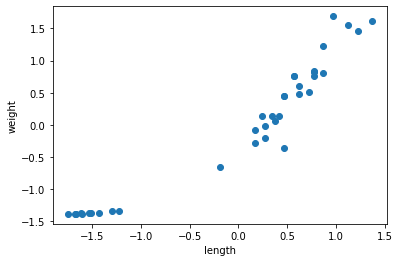

In [88]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### **전처리 데이터로 모델 훈련하기**

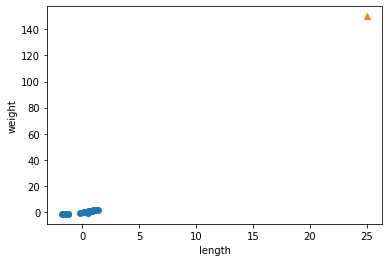

In [89]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**테스트 데이터도 스케일링**

In [90]:
new = ([25, 150] - mean) / std
print(new)

[-0.23012627 -0.94060693]


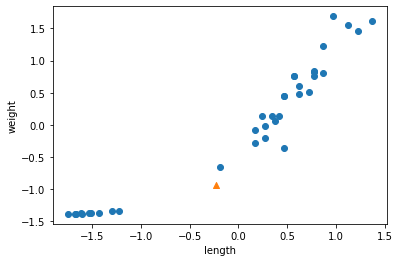

In [91]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [92]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [93]:
test_scaled = (test_input - mean) / std

In [94]:
kn.score(test_scaled, test_target)

1.0

In [95]:
kn.predict([new])

array([1.])

In [96]:
kn.kneighbors([new])

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]], dtype=int64))

In [97]:
dist, idx = kn.kneighbors([new])
print(dist, idx)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


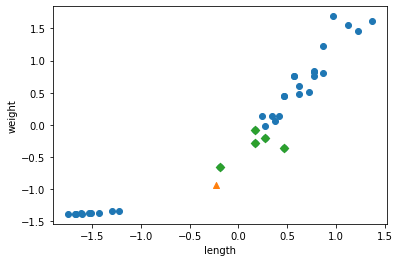

In [99]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker = 'D') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()